Setup

In [1]:
import os

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import nltk
import string
import re
from nltk import word_tokenize, FreqDist,regexp_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer,PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
from sklearn.cluster import AgglomerativeClustering, KMeans, AffinityPropagation
from sklearn.cluster import DBSCAN, OPTICS,MeanShift
from scipy.cluster.hierarchy import dendrogram,linkage

In [5]:
from bs4 import BeautifulSoup as bs
from itertools import takewhile
import requests
import json

In [6]:
%run Code/Functionality.py

In [7]:
Universe['Sector']=Universe.index.map(lambda t:retrieve_co_info(t)[0][:-1])
Universe['Industry']=Universe.index.map(lambda t:retrieve_co_info(t)[1][:-1])

EDA

A

In [8]:
Universe.SIC.apply(lambda s:str(s)[:1]).value_counts()

7    73
4    28
3    24
5    13
6     9
2     3
8     1
Name: SIC, dtype: int64

In [9]:
Universe[Universe.SIC.apply(lambda s:str(s)[0])=='7'].SIC.value_counts()

7372    27
7389    14
7370     8
7374     7
7311     3
7310     2
7990     2
7200     2
7371     1
7320     1
7340     1
7830     1
7373     1
7812     1
7900     1
7841     1
Name: SIC, dtype: int64

Stock Price Correlations

Dataframes for Correlations of Daily Changes (Absolute & Relative to Benchmark)

In [10]:
daily_prices,abs_data,rel_data=collect_market_data(Universe.index)

/Users/george/opt/anaconda3/lib/python3.8/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'FYBR', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


Quick Look @ Correlations Between Daily Changes & Daily Changes relative to the S&P.

In [11]:
abs_data[1]

Symbols,ATEN,ATVI,ADBE,AMD,ABNB,AKAM,ATUS,AMZN,AMC,AMCX,...,USM,SHEN,MSTR,W,OSTK,MELI,CVNA,MVIS,SPSC,FYBR
Symbols,,,,,,,,,,,,,,,,,,,,,
ATEN,1.000000,0.228074,0.294453,0.183571,0.552366,0.230313,0.318568,0.242374,0.202727,0.186590,...,0.201341,0.187498,0.205225,0.215751,0.218393,0.271375,0.242476,0.084423,0.292039,NaN
ATVI,0.228074,1.000000,0.489479,0.298038,-0.137142,0.333179,0.299174,0.411587,0.114690,0.151508,...,0.174945,0.204833,0.213068,0.269723,0.230100,0.310896,0.261769,0.071010,0.290542,NaN
ADBE,0.294453,0.489479,1.000000,0.381599,0.332528,0.415062,0.420495,0.529865,0.207791,0.231628,...,0.284027,0.339378,0.363663,0.353387,0.255644,0.464107,0.375462,0.121766,0.382263,NaN
AMD,0.183571,0.298038,0.381599,1.000000,-0.460263,0.274355,0.316574,0.314807,0.132095,0.185330,...,0.214464,0.219801,0.236506,0.229131,0.187622,0.297483,0.340085,0.095615,0.225735,NaN
ABNB,0.552366,-0.137142,0.332528,-0.460263,1.000000,0.325164,-0.045542,-0.029827,0.572100,-0.409683,...,-0.597258,-0.661260,0.065602,0.086365,0.121211,0.079013,0.454475,0.017205,0.413095,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MELI,0.271375,0.310896,0.464107,0.297483,0.079013,0.324987,0.318908,0.396786,0.157862,0.237183,...,0.220234,0.249454,0.283266,0.316481,0.239300,1.000000,0.344561,0.093959,0.301031,NaN
CVNA,0.242476,0.261769,0.375462,0.340085,0.454475,0.235953,0.298186,0.371150,0.138969,0.171762,...,0.129326,0.180834,0.217842,0.424374,0.196524,0.344561,1.000000,0.095266,0.321038,NaN
MVIS,0.084423,0.071010,0.121766,0.095615,0.017205,0.104998,0.073593,0.107802,0.053244,0.078577,...,0.041932,0.081902,0.079626,0.137012,0.111121,0.093959,0.095266,1.000000,0.092242,NaN


In [12]:
rel_data[0]

Symbols,ATEN,ATVI,ADBE,AMD,ABNB,AKAM,ATUS,AMZN,AMC,AMCX,...,USM,SHEN,MSTR,W,OSTK,MELI,CVNA,MVIS,SPSC,FYBR
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-03,NaN,-0.004884,0.005254,0.024137,NaN,0.014402,NaN,0.012130,NaN,NaN,...,-0.002704,0.022855,0.022615,NaN,-0.004640,0.040756,NaN,0.053201,-0.025872,NaN
2011-01-04,NaN,0.002112,0.008344,0.036732,NaN,-0.021895,NaN,0.005601,NaN,NaN,...,0.000916,-0.027081,0.008442,NaN,-0.005920,0.008873,NaN,0.087172,-0.005110,NaN
2011-01-05,NaN,-0.024161,0.017525,0.010956,NaN,0.031268,NaN,0.008019,NaN,NaN,...,-0.001631,-0.005538,-0.000288,NaN,0.014422,0.015802,NaN,0.027551,0.006628,NaN
2011-01-06,NaN,-0.000318,0.003675,-0.022568,NaN,-0.006065,NaN,-0.006201,NaN,NaN,...,-0.008764,-0.004788,0.002011,NaN,-0.002642,0.035822,NaN,-0.065445,-0.008740,NaN
2011-01-07,NaN,-0.011206,-0.005283,0.017955,NaN,0.006798,NaN,-0.000146,NaN,NaN,...,-0.007161,-0.016892,-0.000392,NaN,-0.040645,-0.007412,NaN,0.021168,-0.005261,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,-0.029930,0.004777,0.002400,-0.000697,-0.023599,0.000200,-0.006028,-0.007486,-0.023068,-0.027544,...,0.006231,0.001532,-0.046748,-0.022245,-0.028614,0.008721,0.013908,-0.018574,-0.006699,NaN
2020-12-28,0.004330,-0.003555,-0.010543,-0.011010,-0.046439,-0.010398,0.015979,0.026349,-0.056531,0.029844,...,0.004286,0.000448,0.138173,-0.066471,-0.104388,-0.024552,-0.093248,0.015705,-0.026852,NaN
2020-12-29,-0.039398,0.001571,0.008561,-0.008471,0.008939,-0.003086,0.028771,0.013811,-0.039614,0.022403,...,-0.008639,-0.006178,-0.008394,-0.018174,0.006319,0.008100,-0.001669,-0.055895,0.001766,NaN


Look @ Some Heatmaps of Correlations

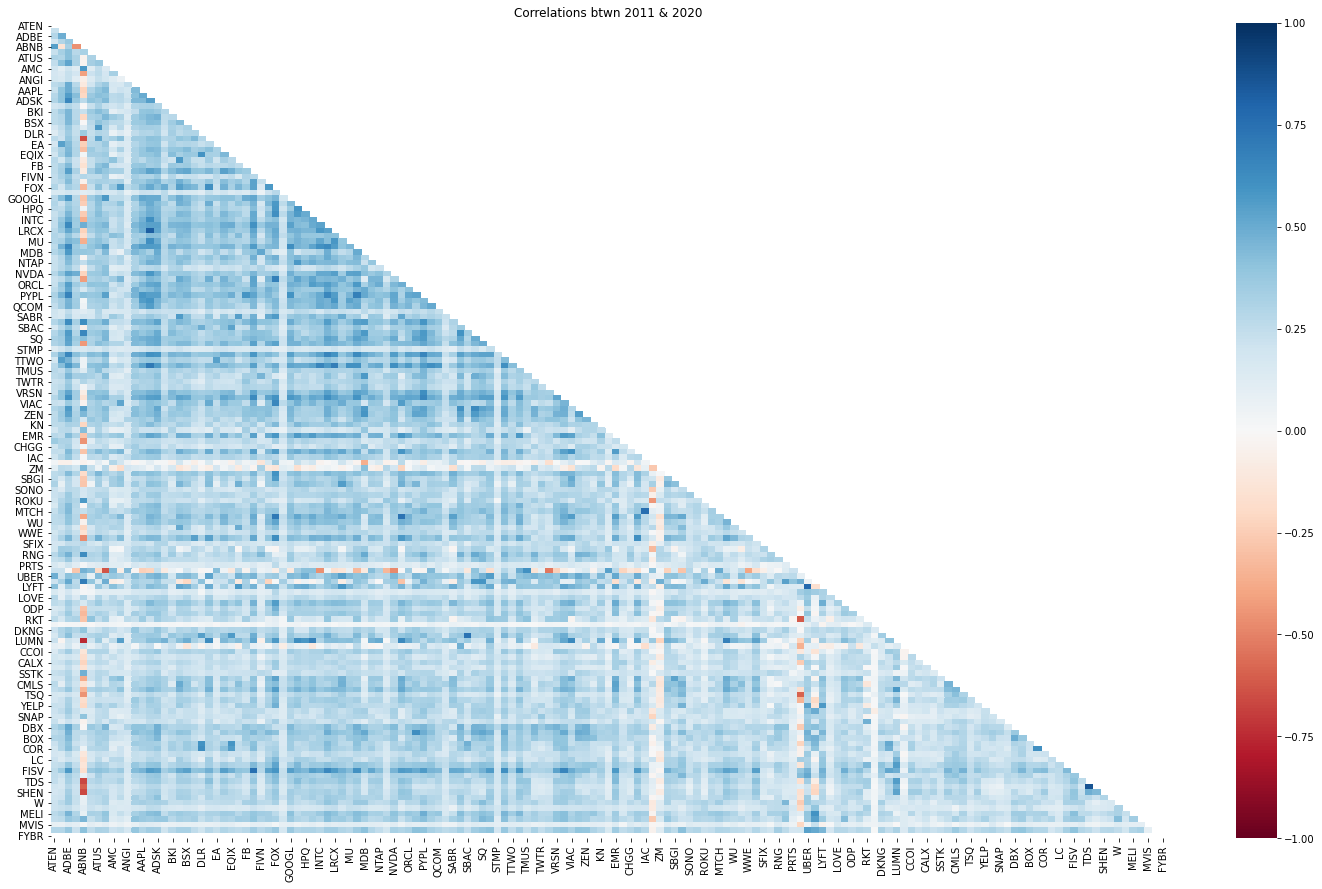

In [13]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(25,15))
ax.set_title('Correlations btwn 2011 & 2020')
mtrx=abs_data[1]
mask = np.zeros_like(mtrx)
mask[np.triu_indices_from(mtrx)] = True
sns.heatmap(mtrx,vmin=-1,vmax=1,cmap='RdBu',ax=ax,mask=mask);
ax.set_xlabel(None)
ax.set_ylabel(None)
fig.savefig(image_path+'Corr Matrix.pdf',
            orientation='landscape',
            pad_inches=0.0,bbox_inches='tight',
            format='pdf'
           )

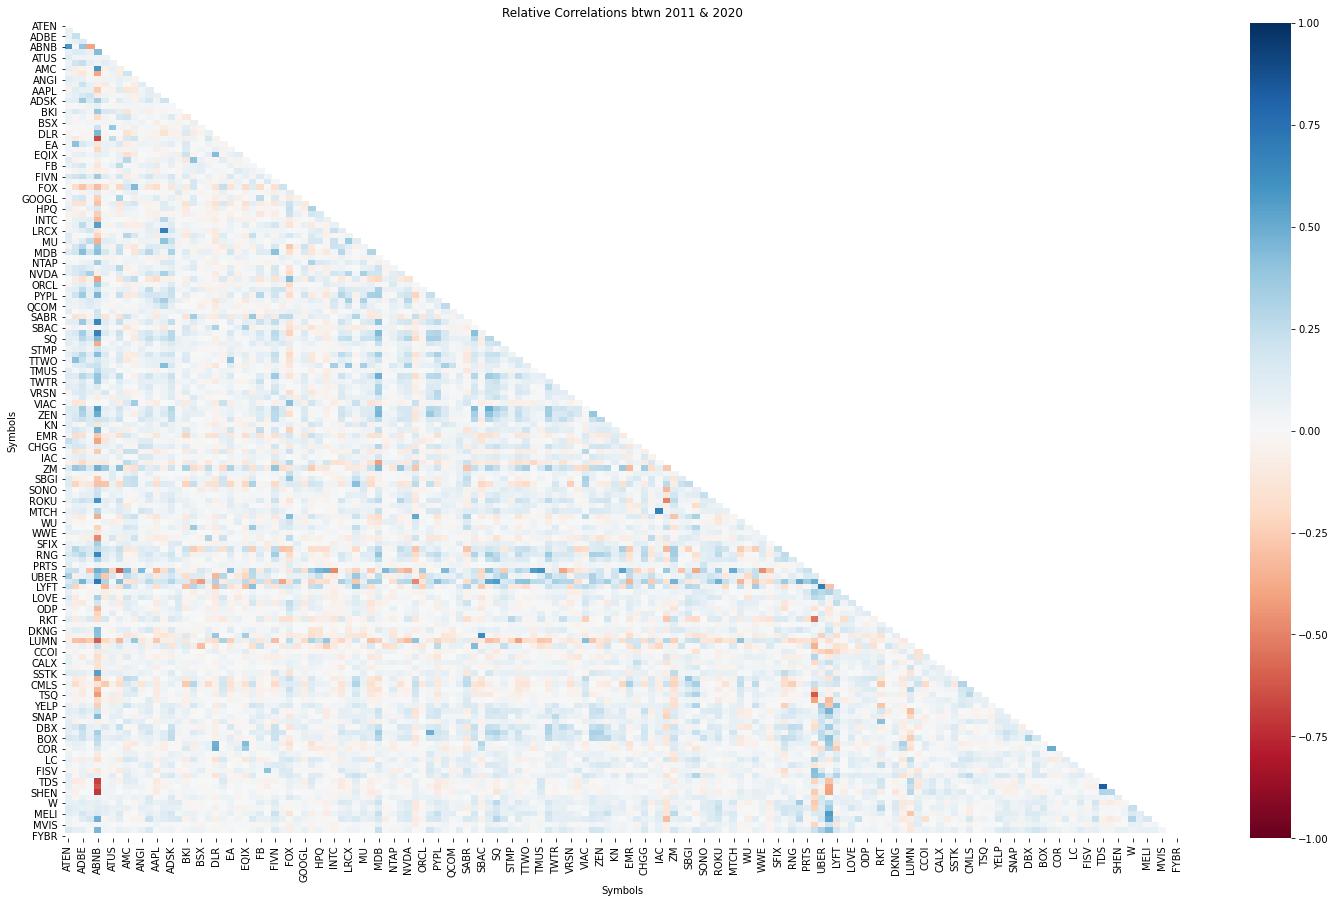

In [14]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(25,15))
ax.set_title('Relative Correlations btwn 2011 & 2020')
mtrx=rel_data[1]
mask = np.zeros_like(mtrx)
mask[np.triu_indices_from(mtrx)] = True
sns.heatmap(mtrx,vmin=-1,vmax=1,cmap='RdBu',ax=ax,mask=mask);
fig.savefig(image_path+'Corr Matrix_Relative.pdf',
            orientation='landscape',pad_inches=0.0,bbox_inches='tight',
            format='pdf'
           )

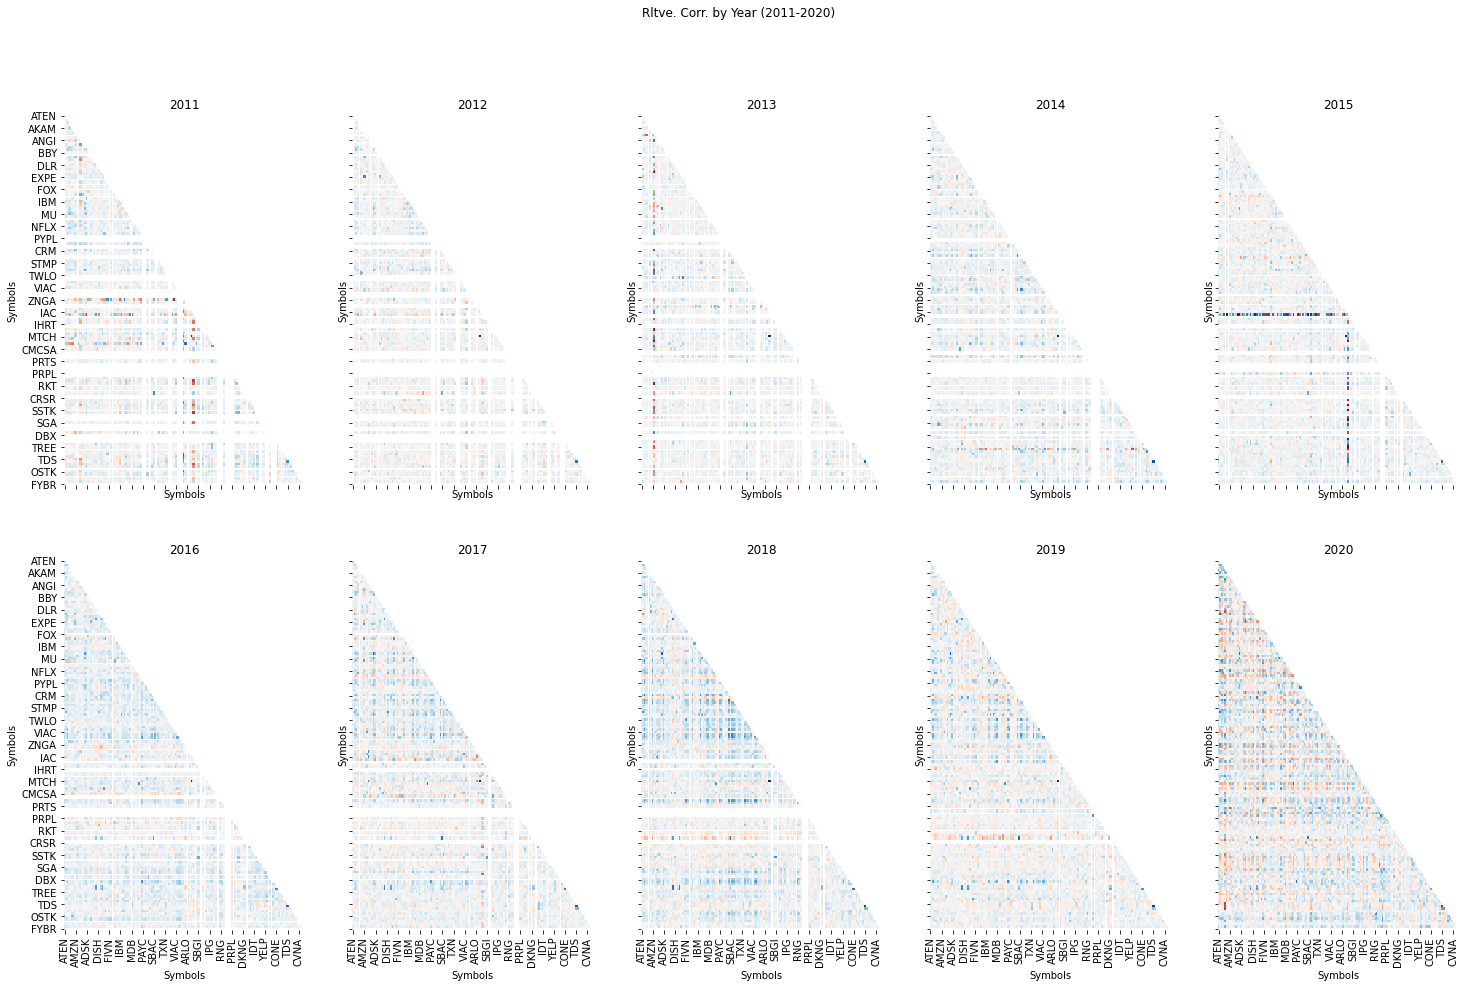

In [15]:
fig,ax=plt.subplots(ncols=5,nrows=2,figsize=(25,15),sharex=True,sharey=True,)
fig.suptitle('Rltve. Corr. by Year (2011-2020)')
axes=ax.reshape(-1)
i=0
for y in coverage:
    a=axes[i]
    a.set_title(y)
    corr_mat=rel_data[2].xs(y+'-12-31')
    mask = np.zeros_like(corr_mat)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr_mat,mask=mask,ax=a,vmin=-1,vmax=1,cbar=False,cmap='RdBu')
    i+=1
fig.savefig(image_path+'Annual Corr Matrices_Relative.pdf',
            orientation='landscape',
            pad_inches=0.0,
            bbox_inches='tight',
            format='pdf'
           )

Given the number of time series in this dataset, it is tough to make any inferences with this visualization.  Let's look @ a different visualization technique...

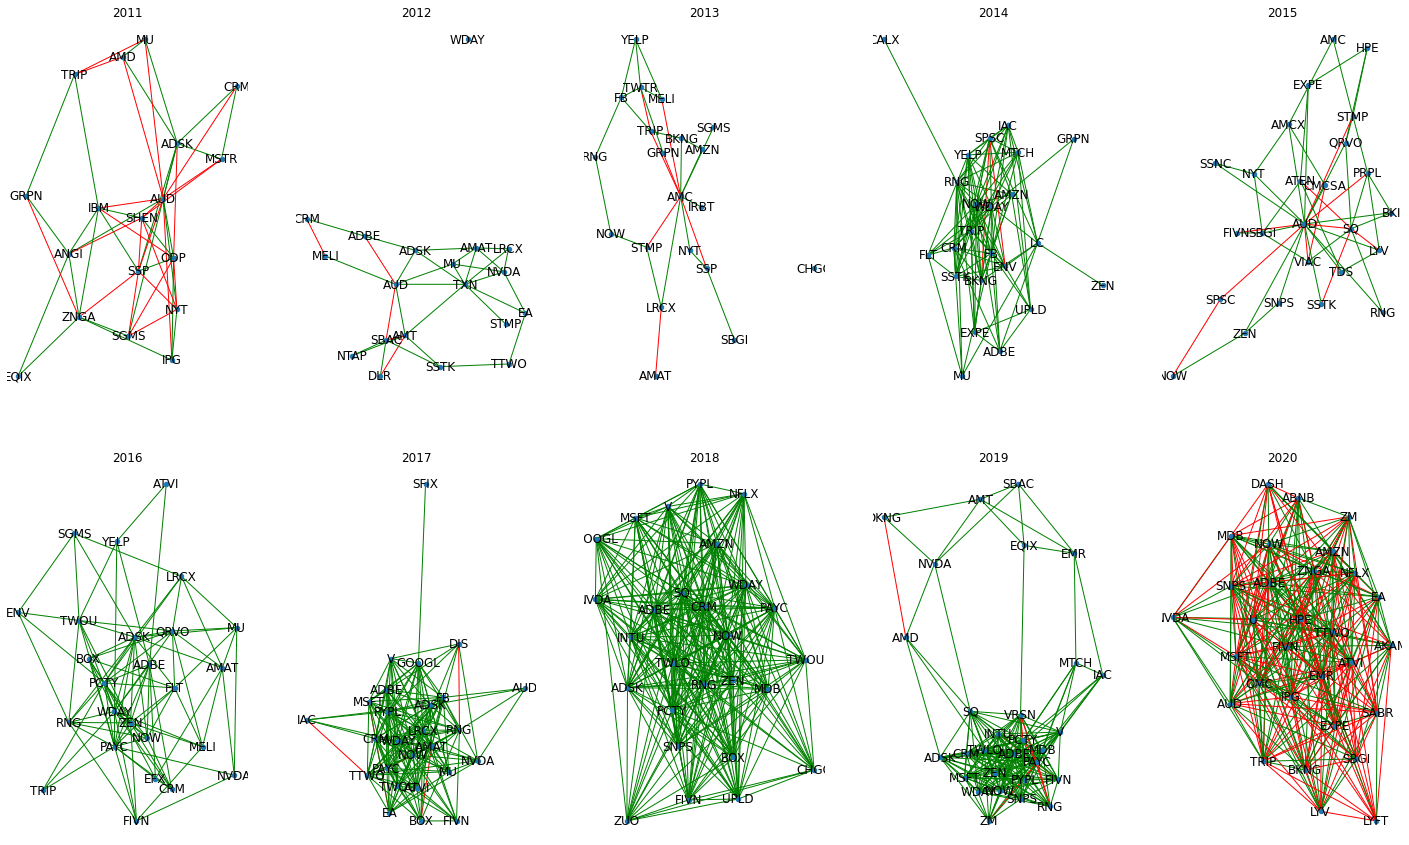

In [16]:
fig,axes=plt.subplots(ncols=5,nrows=2,figsize=(25,15))
axes=axes.reshape(-1)
matrix=rel_data[2]
i=0
for yr in coverage:
    Sigma=matrix.xs(yr+'-12-31')
    Tops=filter_decile(Sigma,0.8)
    G=graphx.Graph()
    G.add_nodes_from(Tops.index)
    colors=[]
    a=axes[i]
    a.set_title(yr)
    for tick_a in G.nodes:
        for tick_b in G.nodes:
            p=Sigma[tick_a][tick_b]
            if((tick_a!=tick_b) and abs(p)>0.25):
                clr='green' if p>0 else 'red'
                colors.append(clr)
                G.add_edge(tick_a,tick_b,color=clr,weight=abs(p))
            else:
                pass
                #print(tick_a,tick_b)
    graphx.draw(G,with_labels=True,edge_color=colors,node_size=20,ax=a)
    i+=1
fig.savefig(image_path+'Annual Universe Structure.pdf',
            orientation='landscape',
            pad_inches=0.0,
            bbox_inches='tight',
            format='pdf'
           )

Moving on to the text...

In [17]:
for tick in Filed.index:
    visualize_stock(tick);

In [18]:
for yr in ['2016','2017','2018','2019','2020']:
    entire_year(yr)

In [19]:
visualize_group(sic_7372.Ticker,'Group 7372')
visualize_group(sic_ex7.Ticker,'Group ex7372')
visualize_group(sic_4.Ticker,'Group 4')
visualize_group(sic_3.Ticker,'Group 3')
visualize_group(sic_56.Ticker,'Groups 5+6')

Let's look at some simple clustering algorithms on the 2020 subset.  This will provide some insight into the different options we have for clustering.

Create some feature engineers with different Vectorizor parameters (all TfIDF).

In [20]:
corpus=collect_texts_year('2020')
parms={'max_df':0.99,'max_features':10,'min_df':0.01}
engineers={}
for n in [10,26,50,100,200,500,1000,1500,2000,5000]:
    parms={'max_df':0.99,'max_features':n,'min_df':0.01}
    engineers[str(n)]=create_extractor(corpus.values(),parms,'max_features'+str(n))

Define some k-mean clustering modelers

In [21]:
Agg=AgglomerativeClustering(n_clusters=20)

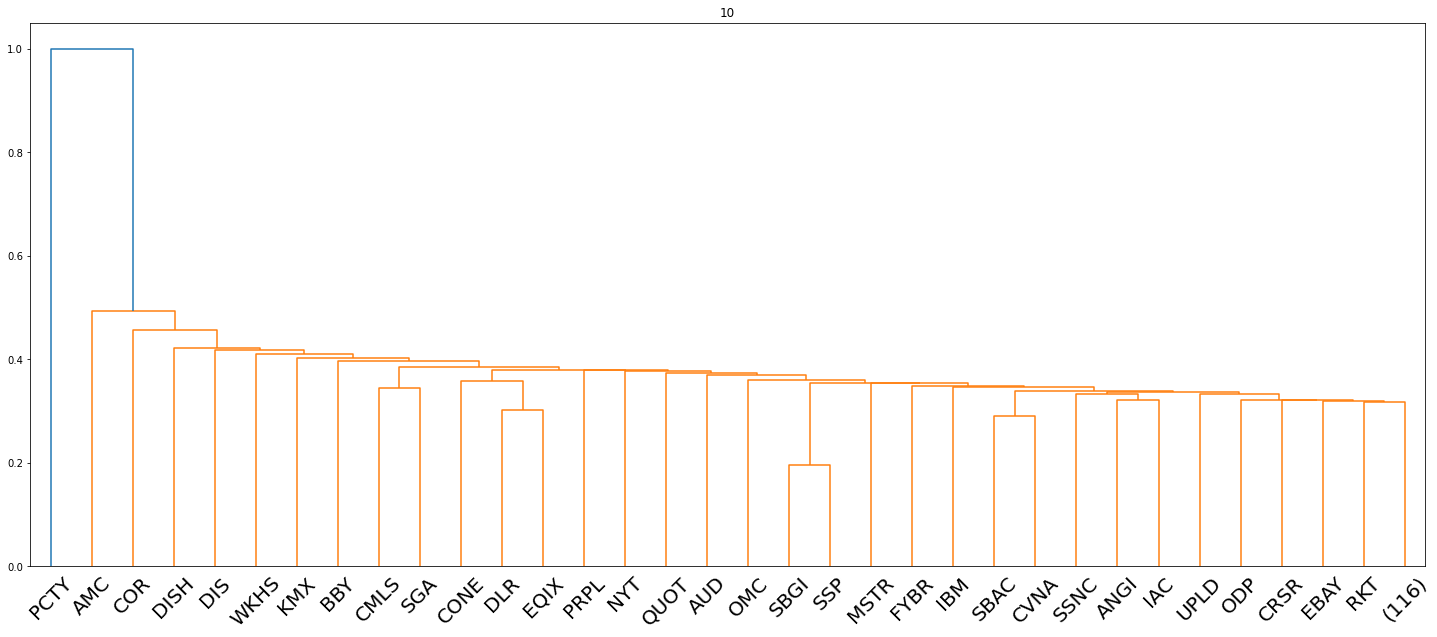

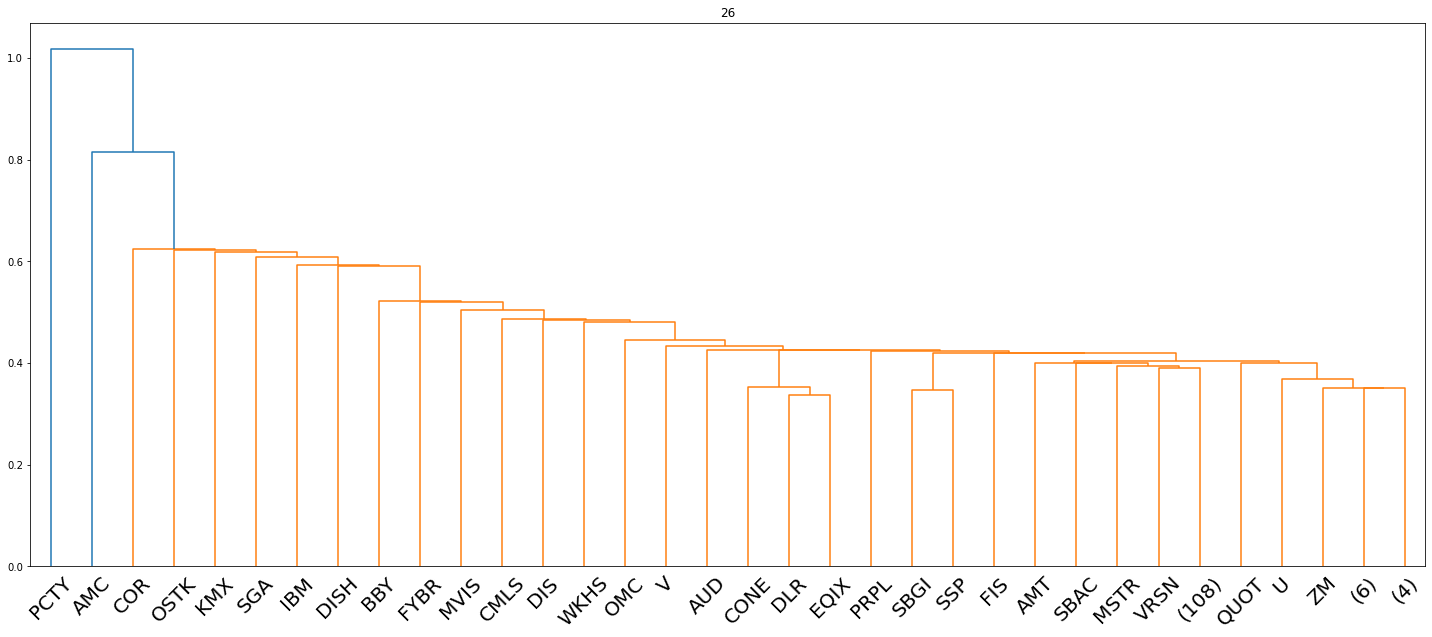

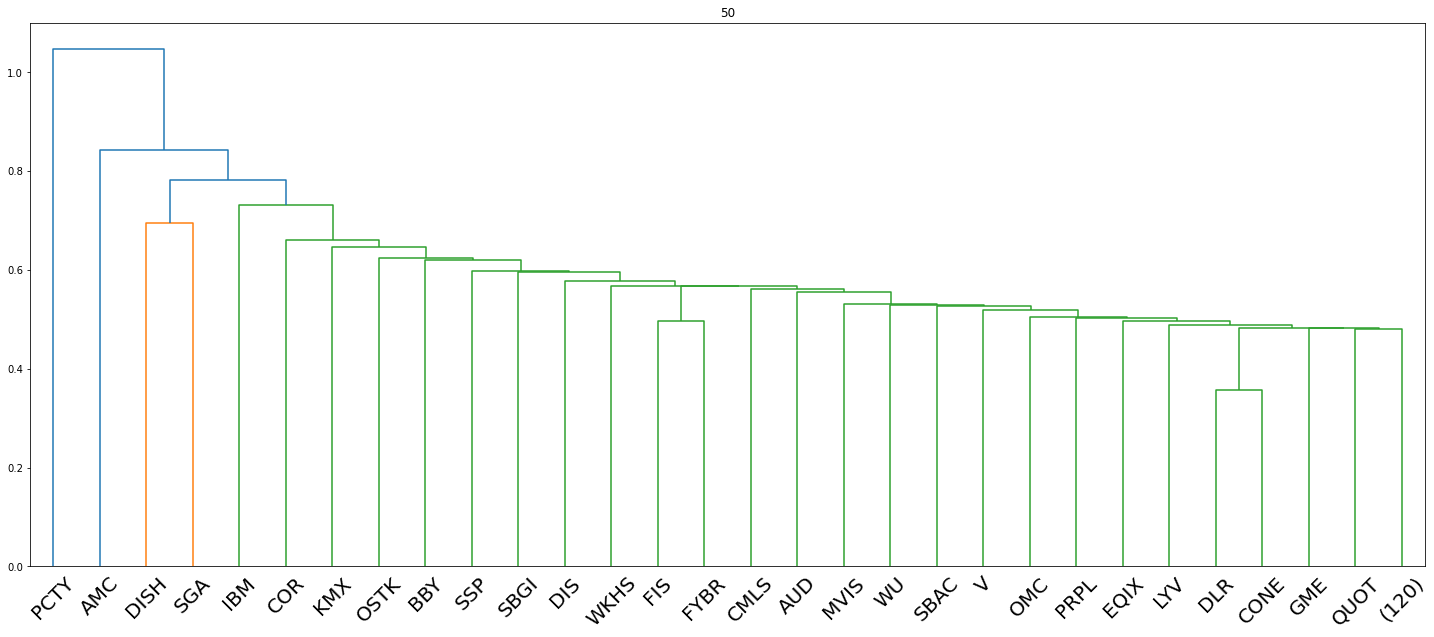

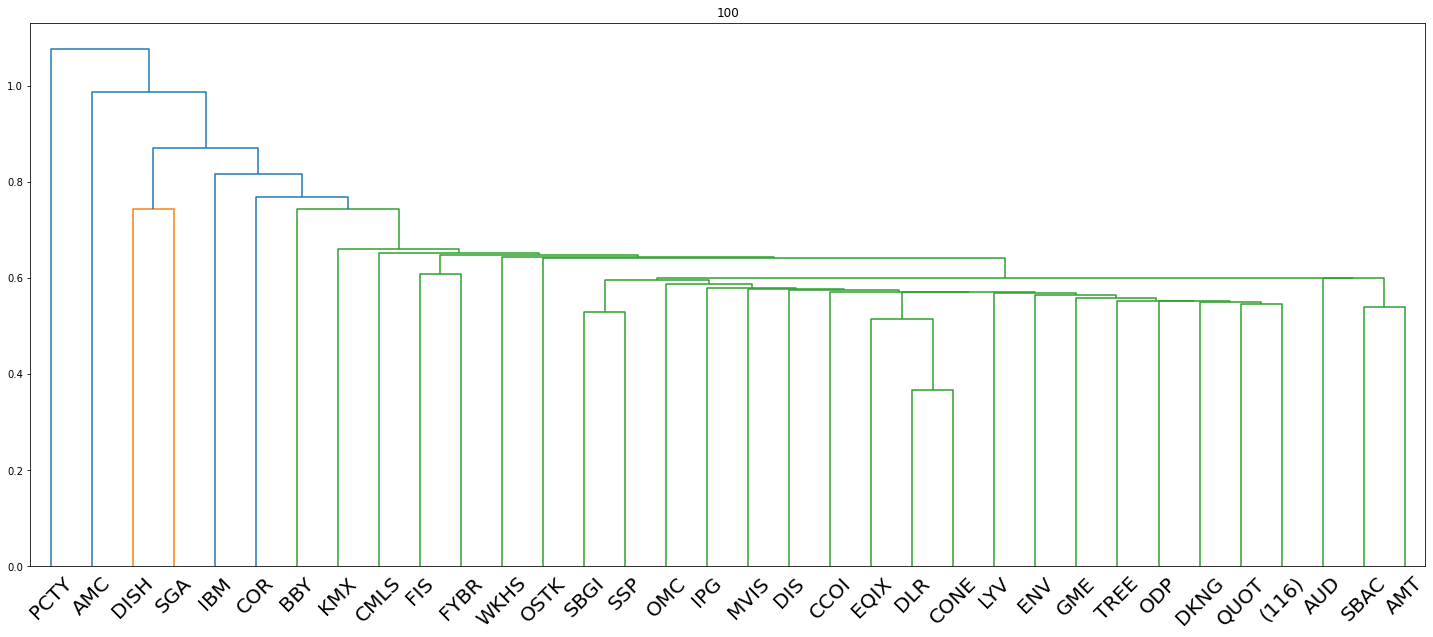

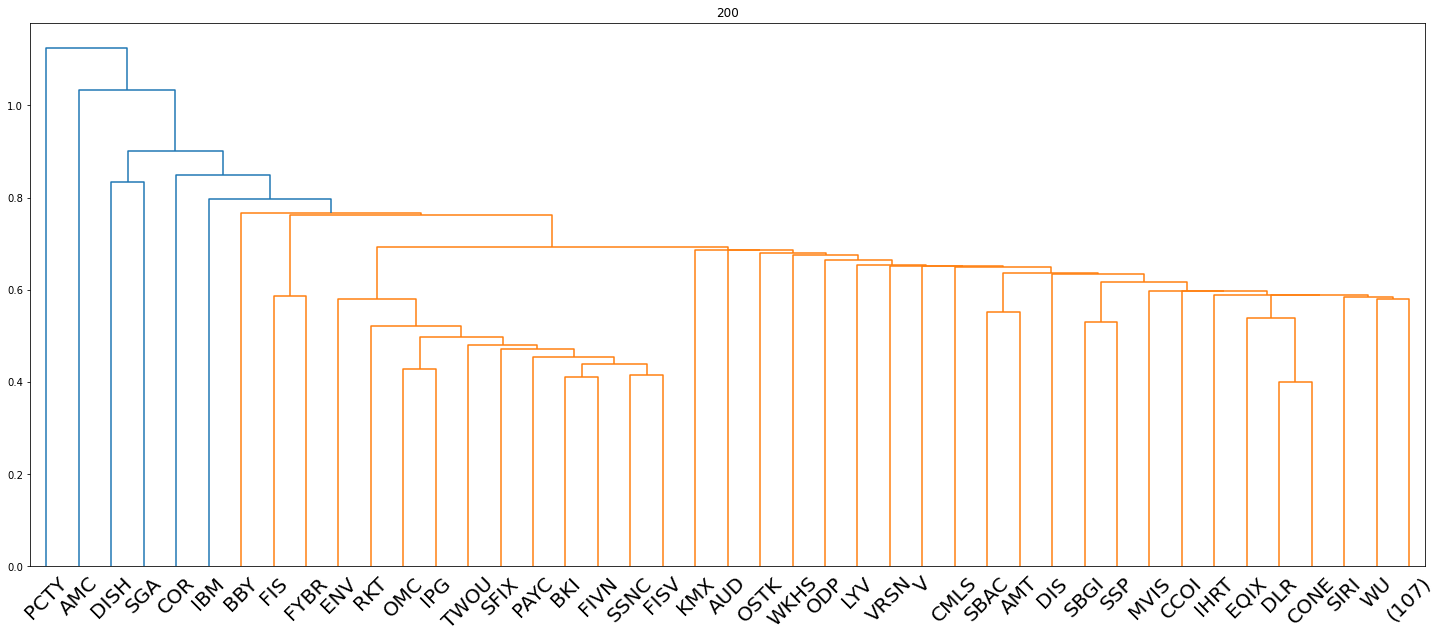

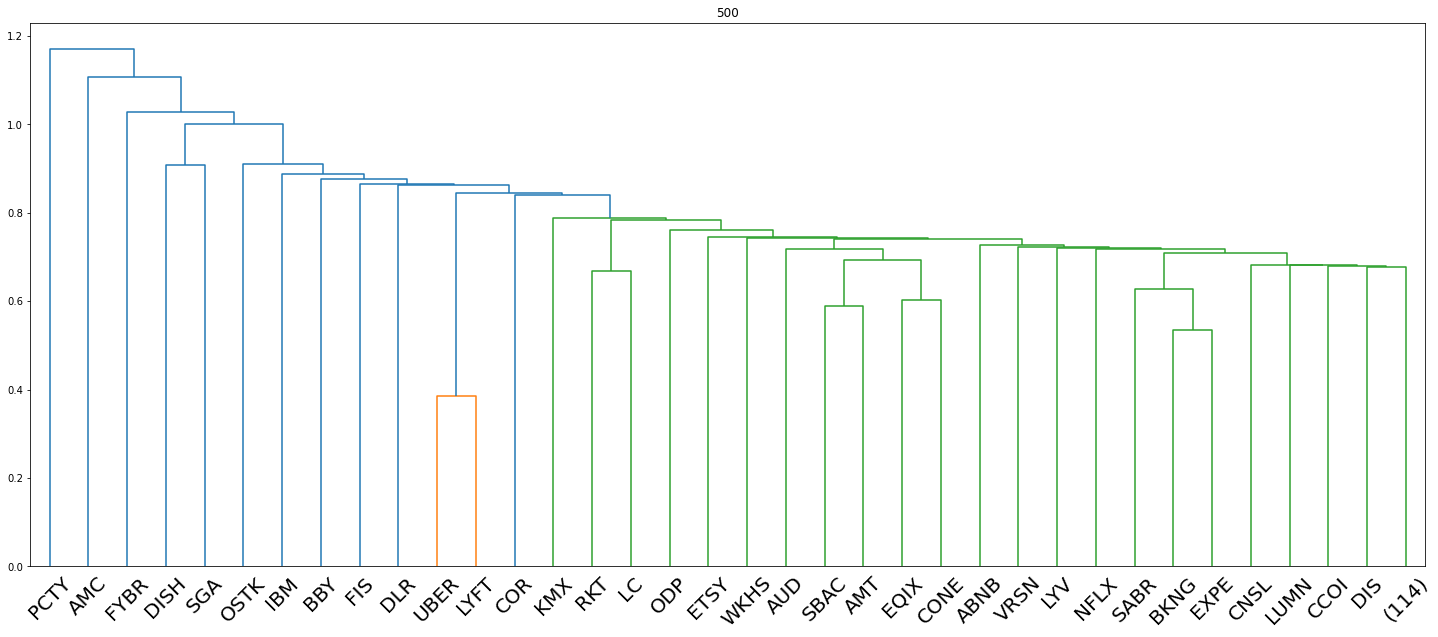

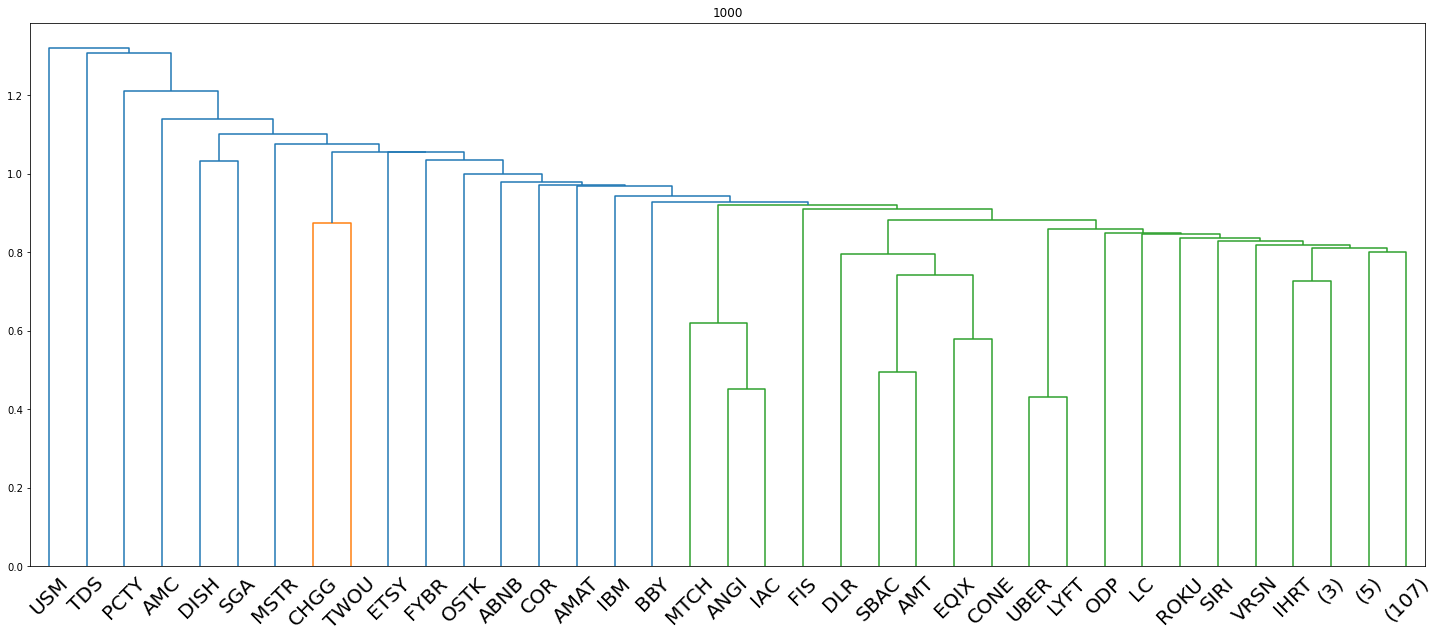

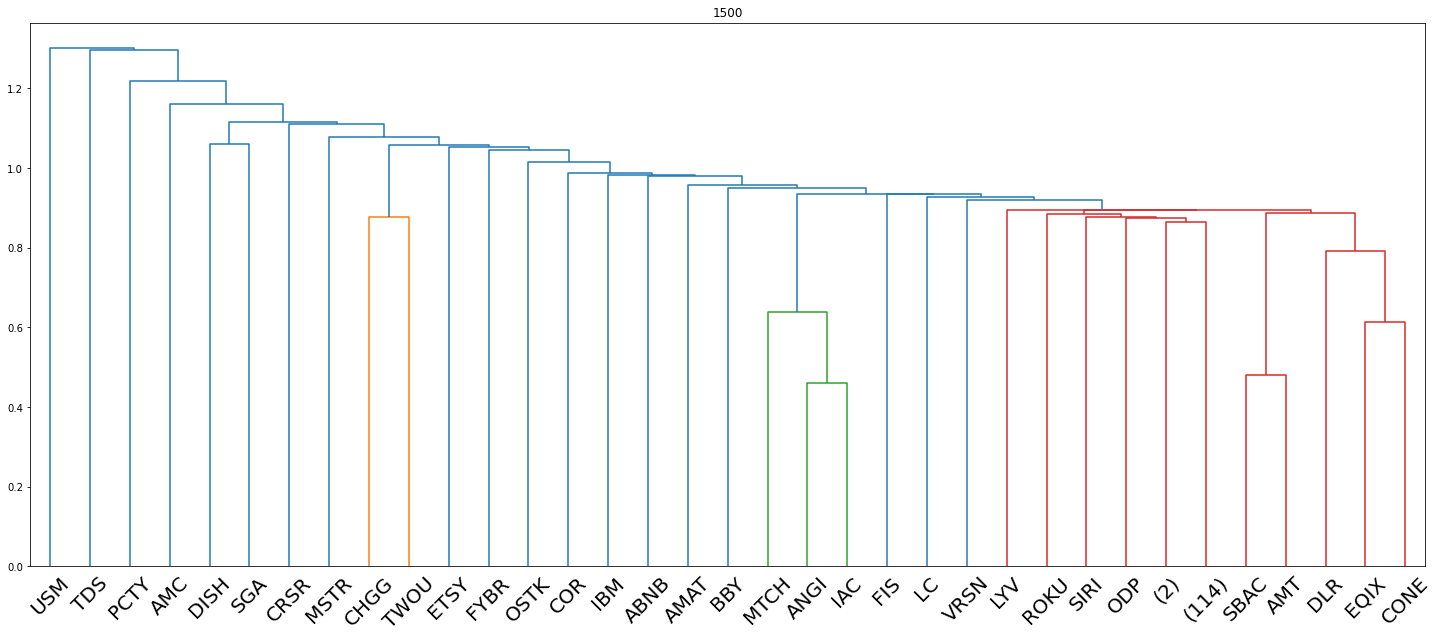

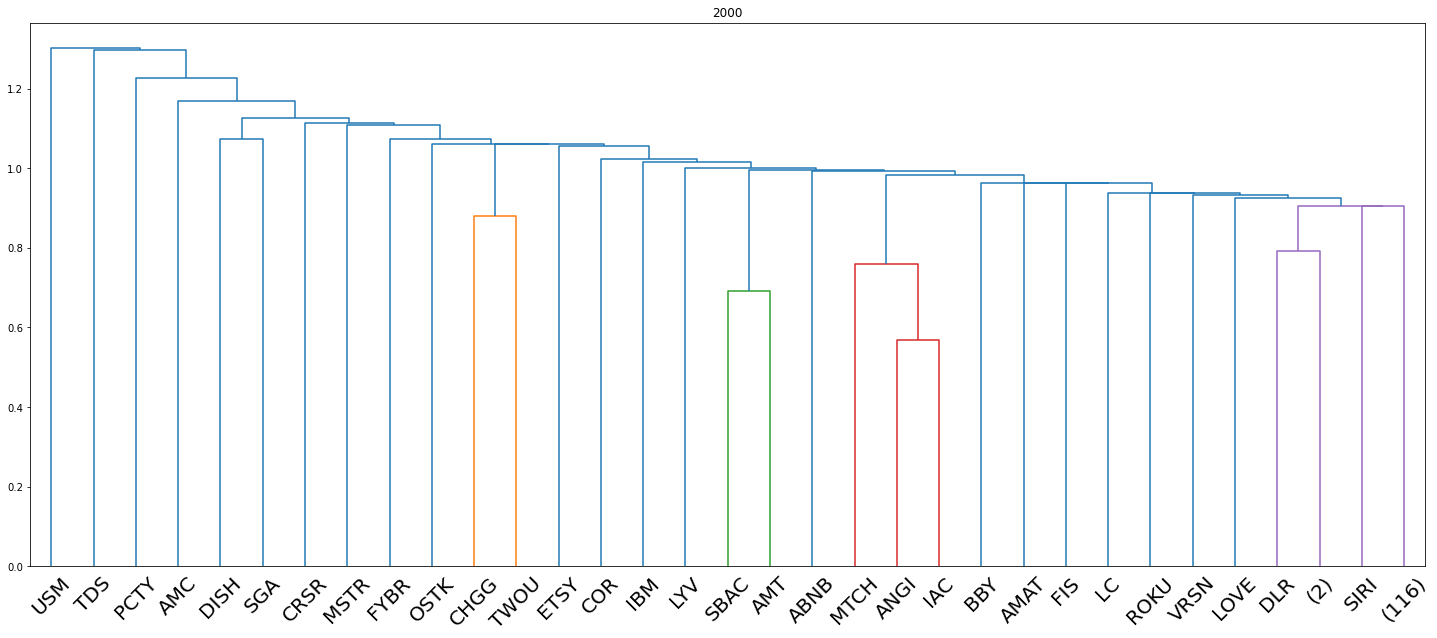

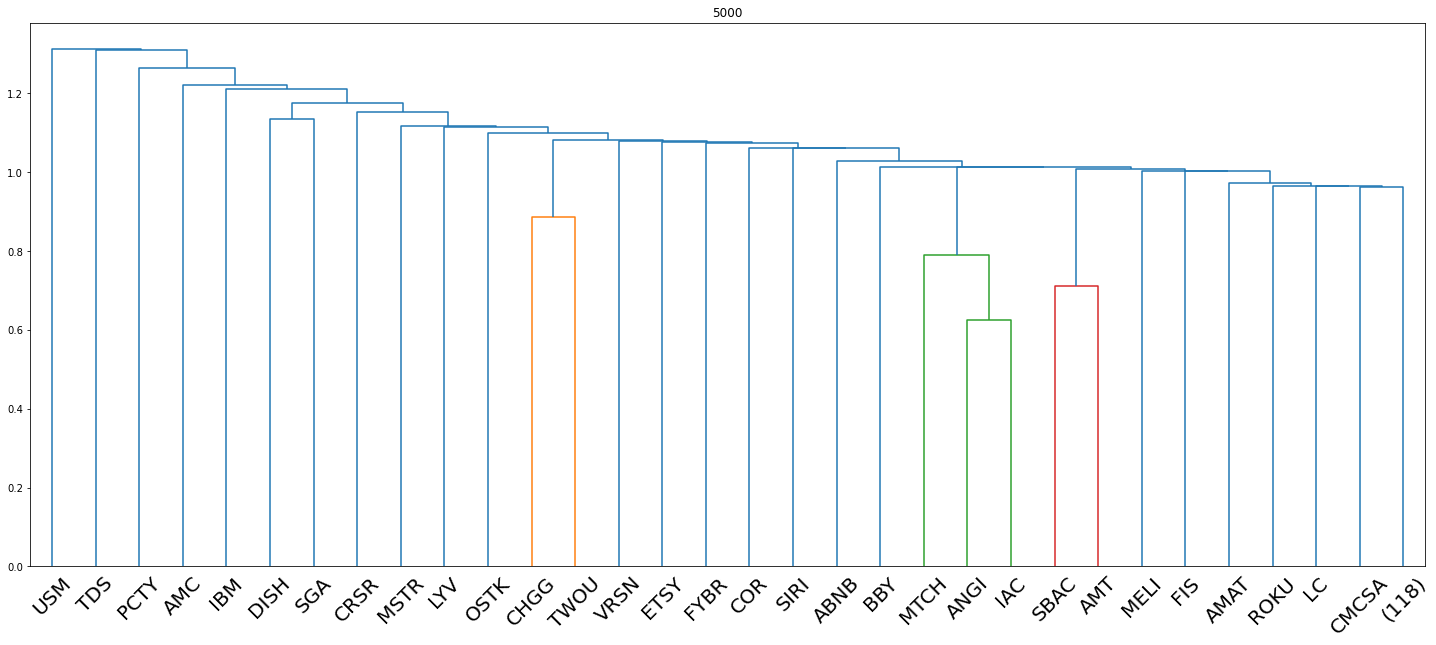

In [22]:
groupings=pd.DataFrame(index=corpus.keys(),columns=engineers.keys())
for max_ftr,engineer in engineers.items():
    X=engineer.transform(corpus.values())
    X_vect=pd.DataFrame.sparse.from_spmatrix(X)
    fig,ax=plt.subplots(figsize=(25,10));
    ax.set_title(max_ftr);
    dendrogram(
            linkage(X_vect),
            leaf_rotation=45.,
            leaf_font_size=20.,
            labels=list(corpus.keys()),
            p=25,
            truncate_mode='level'
            );
    plt.savefig(image_path+'Dendograms/2020_MaxF'+max_ftr+'.pdf',
                orientation='landscape',
                pad_inches=0.0,
                bbox_inches='tight',
                format='pdf'
               );
    
    
    Agg.fit(X.toarray())
    groupings[max_ftr]=Agg.labels_    
groupings.to_excel(parent_path+'Data/Results/Different_Max_Features.xlsx')

In [23]:
distributions=pd.DataFrame(index=range(0,20),columns=engineers.keys())
for max_feature in engineers.keys():
    distributions[max_feature]=groupings[max_feature].value_counts()

Different Clustering Options...

In [24]:
corpus=collect_texts_all()

In [25]:
K3=KMeans(n_clusters=3)
K5=KMeans(n_clusters=5)
K8=KMeans(n_clusters=8)
K10=KMeans(n_clusters=10)
K15=KMeans(n_clusters=15)
K25=KMeans(n_clusters=25)
clusterers={'3':K3,'5':K5,'8':K8,'10':K10,'15':K15,'25':K25}

In [26]:
groupings=pd.DataFrame(index=corpus.keys(),columns=engineers.keys())
engineer=create_extractor(corpus.values(),parms)
X=engineer.transform(corpus.values())
for n,clusterer in clusterers.items():
    clusterer.fit(X.toarray())
    groupings[n]=clusterer.labels_
groupings.to_excel(parent_path+'Data/Results/KNNs.xlsx')

In [27]:
links=['ward','complete','average','single']
groupings=pd.DataFrame(index=corpus.keys(),columns=links)
engineer=create_extractor(corpus.values(),parms)
X=engineer.transform(corpus.values())
XX=X.toarray()
for link in links:
    Agg=AgglomerativeClustering(n_clusters=20,linkage=link)
    Agg.fit(XX)
    groupings[link]=Agg.labels_
    
groupings.to_excel(parent_path+'Data/Results/Linkages.xlsx')

In [33]:
Aff=AffinityPropagation(max_iter=1000,random_state=STATE)
parms={'max_df':0.99,'max_features':750,'min_df':0.01}
engineer=create_extractor(corpus.values(),parms)
X=engineer.transform(corpus.values())
Aff.fit(X.toarray())
Aff_Clusters=pd.DataFrame(zip(corpus.keys(),Aff.labels_),columns=['Ticker','Category'])
Aff_Clusters.to_excel(parent_path+'Data/Results/Affinity_Labels.xlsx')

In [34]:
centers=Aff.cluster_centers_indices_.tolist()
Aff_Summary=Aff_Clusters.loc[centers]
Aff_Summary.set_index(['Category'],inplace=True)
Aff_Summary['Count']=Aff_Clusters.Category.value_counts()
Aff_Summary.to_excel(parent_path+'Data/Results/Affinity_Summary.xlsx')

In [35]:
corpus_full=collect_texts_all()
for yr in ['2020','2019','2018','2017','2016']:
    target_corpus=collect_texts_year(yr)
    Aff=AffinityPropagation(max_iter=500,random_state=STATE)
    parms={'max_df':0.99,'max_features':1000,'min_df':0.01}
    engineer=create_extractor(corpus_full.values(),parms)
    X=engineer.transform(target_corpus.values())
    Aff.fit(X.toarray())
    Aff_Clusters=pd.DataFrame(zip(target_corpus.keys(),Aff.labels_),columns=['Ticker','Category'])
    Aff_Clusters.to_excel(parent_path+'Data/Results/Affinity_Labels_'+yr+'.xlsx')

    centers=Aff.cluster_centers_indices_.tolist()
    Aff_Summary=Aff_Clusters.loc[centers]
    Aff_Summary.set_index(['Category'],inplace=True)
    Aff_Summary['Count']=Aff_Clusters.Category.value_counts()
    Aff_Summary.to_excel(parent_path+'Data/Results/Affinity_Summary_'+yr+'.xlsx')

In [36]:
#corpus_full=collect_texts_all()
corpus_3yr=collect_texts_years(['2020','2019','2018'])
corpus_20=collect_texts_year('2020')
corpus_19=collect_texts_year('2019')
corpus_18=collect_texts_year('2018')

In [37]:

parms={'max_df':0.99,'max_features':1000,'min_df':0.01}
engineer1=create_extractor(corpus_full.values(),parms,'Alltime')
engineer2=create_extractor(corpus_full.values(),parms,'3_Years')
engineer3=create_extractor(corpus_20.values(),parms,'2020s')
engineer4=create_extractor(corpus_19.values(),parms,'2019s')
engineer5=create_extractor(corpus_18.values(),parms,'2018s')

X1=engineer1.transform(corpus_20.values())
X2=engineer2.transform(corpus_20.values())
X3=engineer3.transform(corpus_20.values())
X4=engineer4.transform(corpus_20.values())
X5=engineer5.transform(corpus_20.values())

clusterer=clusterers['15']

clusterer.fit(X1.toarray())
clustering1=clusterer.labels_

clusterer.fit(X2.toarray())
clustering2=clusterer.labels_

clusterer.fit(X3.toarray())
clustering3=clusterer.labels_

clusterer.fit(X4.toarray())
clustering4=clusterer.labels_

clusterer.fit(X5.toarray())
clustering5=clusterer.labels_

In [38]:
DF=pd.DataFrame(zip(corpus.keys(),clustering1,clustering2,clustering3,clustering4,clustering5),
                columns=['Ticker','Category-Full','Category-3yr','Category-20','Category-19','Category-18'],
               )
DF.to_excel(parent_path+'Data/Results/Comp_Dictionary.xlsx')

Clustering w/ Agg.Prop...Done two ways.

In [39]:
five_years=['2020','2019','2018','2017','2016']
stocks=Filed[
            Filed['2020'] & 
            Filed['2019'] & 
            Filed['2018'] & 
            Filed['2017'] & 
            Filed['2016']
            ].index

Way 1: Cluster entire corpus simultaneously.

In [40]:
full_corpus=collect_texts_years(five_years)
corpus=collect_texts(stocks,five_years)

In [41]:
parms={'max_df':0.99,'max_features':1000,'min_df':0.01}
engineer=create_extractor(full_corpus.values(),parms,'All_5yrs')
clusterer=AgglomerativeClustering(n_clusters=20)

In [42]:
X=engineer.transform(corpus.values())
clusterer.fit(X.toarray())

AgglomerativeClustering(n_clusters=20)

In [43]:
DF_All=pd.DataFrame(zip(clusterer.labels_,corpus.keys()),columns=['Group','Stock_Year'])
DF_All['Stock']=DF_All.Stock_Year.apply(lambda s:s.split('_')[0])
DF_All['Year']=DF_All.Stock_Year.apply(lambda s:s.split('_')[1])
DF_All.set_index(['Stock','Year'])
DF_All.to_excel(parent_path+'Data/Results/5Yr_Simultaneous.xlsx')

Way 2:  Split corpus into 5 parts (one for each year) prior to apply clustering.

In [44]:
DF_byYear=pd.DataFrame(columns=five_years,index=stocks)
parms={'max_df':0.99,'max_features':1000,'min_df':0.01}
engineer=create_extractor(full_corpus.values(),parms)

In [45]:
for y in five_years:
    corpus=collect_texts(stocks,[y])
    X=engineer.transform(corpus.values())
    clusterer.fit(X.toarray())
    DF_byYear[y]=clusterer.labels_

In [46]:
DF_byYear.to_excel(parent_path+'Data/Results/5Yr_Annuals.xlsx')

Calculate Weightings to generate similarity matrix.

In [47]:
weights={'2020':0.3,'2019':0.2,'2018':0.2,'2017':0.15,'2016':0.15}
S=groups_to_similarity(DF_byYear,weights)
S.to_excel(parent_path+'Data/Results/5yr_Similarity.xlsx')

Second Methodology Except w/ 10 Year horizon

In [48]:
ten_years=['2020','2019','2018','2017','2016',
            '2015','2014','2013','2012','2011']
stocks=Filed[
            Filed['2020'] & 
            Filed['2019'] & 
            Filed['2018'] & 
            Filed['2017'] & 
            Filed['2016'] &
            Filed['2015'] & 
            Filed['2014'] & 
            Filed['2013'] & 
            Filed['2012'] & 
            Filed['2011']
            ].index
full_corpus=collect_texts_years(ten_years)

In [49]:
parms={'max_df':0.99,'max_features':1000,'min_df':0.01}
engineer=create_extractor(full_corpus.values(),parms)
clusterer=AgglomerativeClustering(n_clusters=20)

In [50]:
DF_byYear=pd.DataFrame(columns=ten_years,index=stocks)
for y in ten_years:
    corpus=collect_texts(stocks,[y])
    X=engineer.transform(corpus.values())
    clusterer.fit(X.toarray())
    DF_byYear[y]=clusterer.labels_
DF_byYear.to_excel(parent_path+'Data/Results/10Yr_Annuals.xlsx')

In [51]:
weights={'2020':0.20,'2019':0.20,'2018':0.15,'2017':0.10,'2016':0.10,
         '2015':0.05,'2014':0.05,'2013':0.05,'2012':0.05,'2011':0.05}
S=groups_to_similarity(DF_byYear,weights)
S.to_excel(parent_path+'Data/Results/10yr_Similarity.xlsx')